### Student Name: Aidan Keeshan
### Student ID: 18200117

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(n_samples=1000, noise = 0.05)
y = [yy if yy == 1 else -1 for yy in y] 

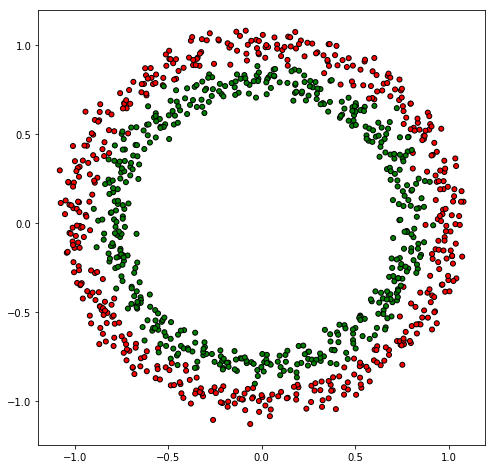

In [3]:
plt.figure(figsize=(8, 8))
colors = ['green' if yy == 1 else 'red' for yy in y] 
plt.scatter(X[:,0],X[:,1], color=colors, marker='o',s=25, edgecolors='black')
plt.show()

In [4]:
def train_test_split(X,y,test_size):
    indexs = np.arange(X.shape[0])
    np.random.shuffle(indexs)
    ind_split = np.int((1-test_size)*indexs.shape[0])
    ind_test = indexs[ind_split:]
    ind_train = indexs[:ind_split]
    y = np.array(y)
    return [X[ind_train],X[ind_test],y[ind_train],y[ind_test]]



In [92]:
print (X_train.shape)
print (y_test.shape)

(669, 2)
(331,)


In [120]:
class lin_cls:
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)        
        pseudo_inv_matrix = np.linalg.pinv(X)
        weight_matrix = pseudo_inv_matrix.dot(y)
        self.w = weight_matrix
        
    def calculate_error(self,X,y):
        yhat = self.predict(X)
        return ((y != yhat).sum()/len(y))

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return np.sign(np.dot(X, np.transpose(self.w)))
    
    def predict_point(self, X):
        return -(self.w[0]+self.w[1]*X)/self.w[2]


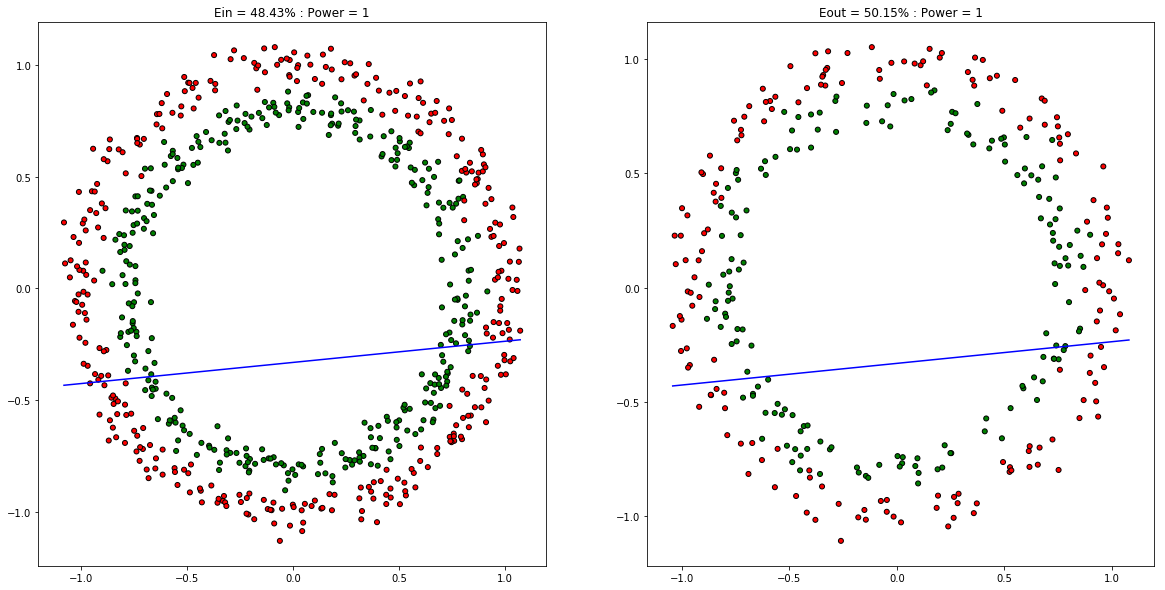

In [124]:
def plot_circle(X,y,lincls,title):
    xs = [X[:,0].min(), X[:,0].max()]
    ys = [lincls.predict_point(xs[0]),lincls.predict_point(xs[1])]
    colors = ['green' if yy == 1 else 'red' for yy in y] 
    _ = plt.plot(xs, ys, color='blue')
    _ = plt.scatter(X[:,0],X[:,1], color=colors, marker='o',s=25, edgecolors='black')
    _ = plt.title(title)

def run_reg(X_in,y_in,power=1):
    X_in = np.power(X_in,power)
    X_train, X_test, y_train, y_test = train_test_split(X_in,y_in, test_size=0.33)
    lincls = lin_cls()
    lincls.fit(X_train,y_train)
    
    f, axs = plt.subplots(1, 2, figsize=(20, 10))
    plt.subplot(1, 2, 1)
    train_error = lincls.calculate_error(X_train,y_train)
    plot_circle(X_train,y_train,lincls,"Ein = {:.2%} : Power = {}".format(train_error,power))
    plt.subplot(1, 2, 2)
    test_error  = lincls.calculate_error(X_test, y_test)
    plot_circle(X_test,y_test,lincls,"Eout = {:.2%} : Power = {}".format(test_error,power))
    plt.show()
    
run_reg(X,y)

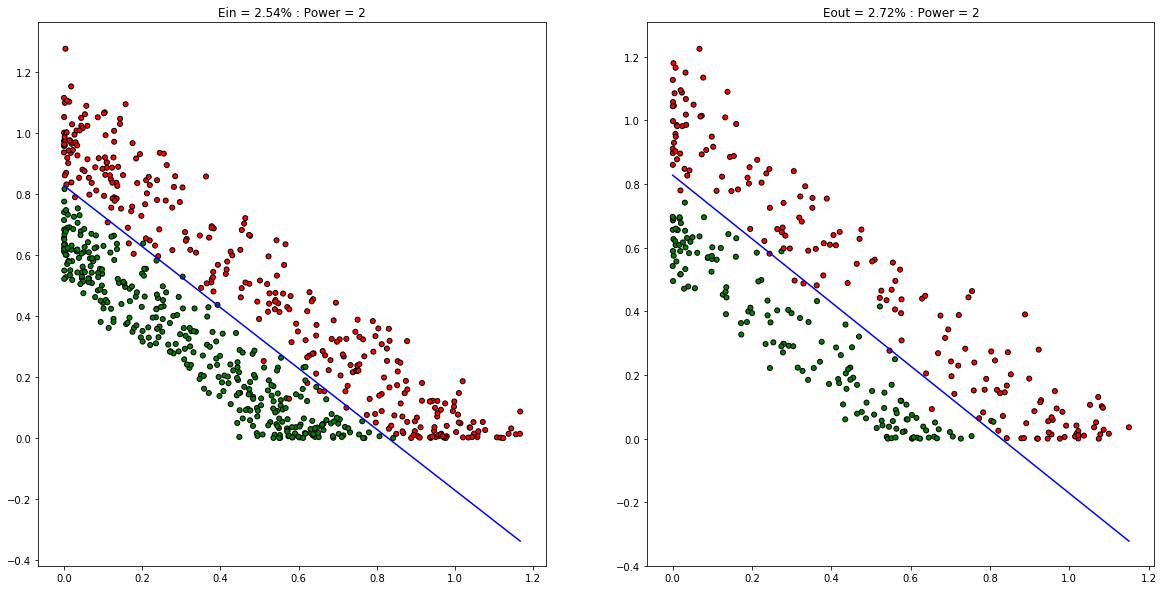

In [125]:
run_reg(X,y,2)

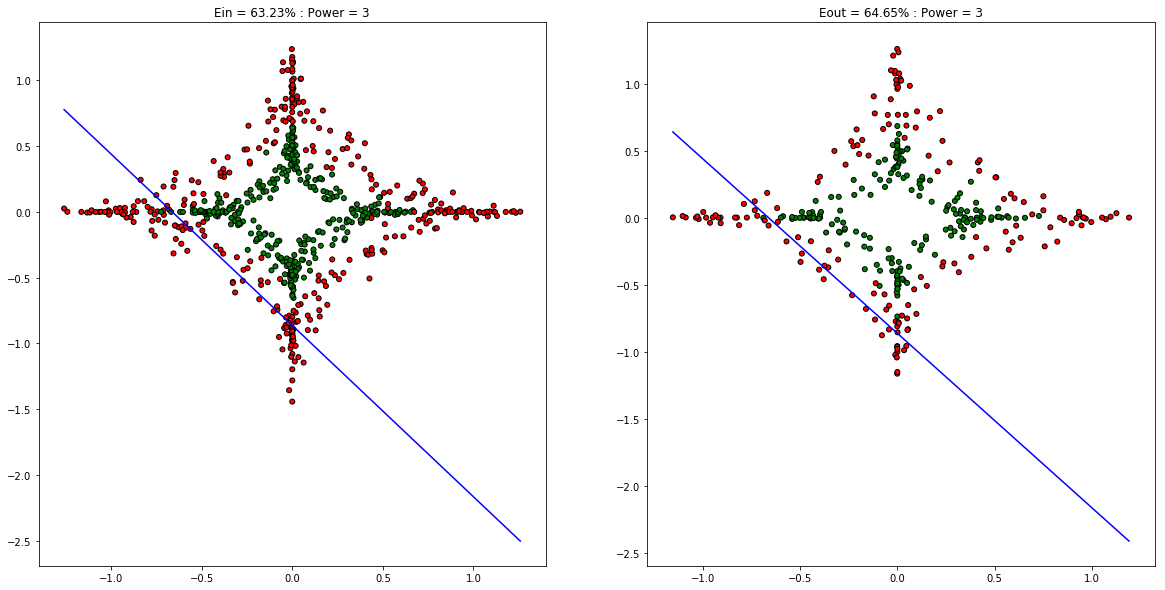

In [126]:
run_reg(X,y,3)